<a href="https://colab.research.google.com/github/ljubantomic01/YOLOv8-detection/blob/main/YOLOv8_detekcija_ovaca_i_sova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detekcija ovaca i sova pomoću YOLOv8
Ova skripta opisuje postupak treniranja modela pomoću Ultralitycs YOLOv8 pretreniranog modela, čiji je cilj detekcija ovaca i sova na slici. Podaci su preuzeti iz Open Images Dataseta, a ukupno je 1000 slika. Istrenirani model je deploy-an na Roboflow radi praktičnije inferencije, a istreniran je u Google Colabu radi dostupnosti besplatnih i kvalitetnih GPU resursa koji značajno ubrzavaju postupak treniranja, ali i zbog smanjene potrebe instaliranja ostalih paketa i okruženja, koji su već predinstalirani.



## 1. Instaliranje YOLOv8

In [1]:
#preuzimanje paketa potrebnog za yolov8
!pip install ultralytics

In [8]:
#uvoz potrebnih biblioteka
from ultralytics import YOLO
from IPython.display import display, Image
from PIL import Image as PILImage
import glob

In [ ]:
#provjera trenutnog (radnog) direktorija
%pwd

'/content'

## 2. Isprobavanje predtreniranog modela
Model je testiran na slici mačke jer je model treniran na COCO datasetu čija je klasa i mačka.

In [17]:
#isprobavanje yolov8n (nano) modela na proizvoljnoj slici
model = YOLO('yolov8n.pt') #učitavanje modela nano
source = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/1200px-Cat_August_2010-4.jpg' #izvor slike
results = model(source) #stavljanje slike u model radi detekcije

#isčitavanje rezultata
for result in results:
    im_array = result.plot() #iscrtavanje BGR numpy array-a detekcije
    im = PILImage.fromarray(im_array[..., ::-1]) #formiranje RGB slike od im_array
    im.save('cat_result.jpg') #spremanje slike

100%|██████████| 6.23M/6.23M [00:00<00:00, 136MB/s]


100%|██████████| 136k/136k [00:00<00:00, 2.77MB/s]

image 1/1 /content/1200px-Cat_August_2010-4.jpg: 416x640 1 cat, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


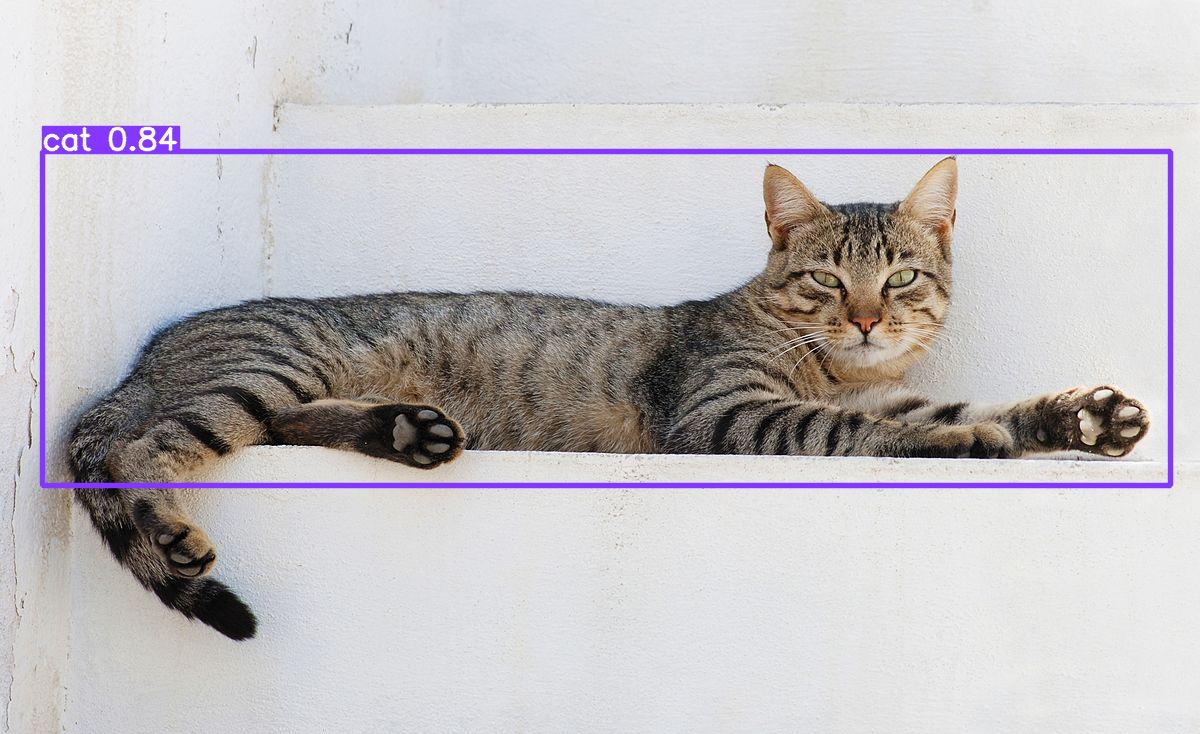

In [18]:
#prikazivanje slike sa plotanom detekcijom
display(Image(filename='cat_result.jpg', height = 500))

## 3. Preuzimanje dijela dataseta 'Open Images Dataset'
Korišten je alat za preuzimanje Open Images Dataseta, OIDv6 Toolkit, a slike su na kraju preuzete lokalno, pa su prikazani terminali kada su slike preuzete, a ispod je primjer koraka sve do preuzimanja.

Link za Open Images Dataset: https://storage.googleapis.com/openimages/web/download_v7.html

Link za OIDv6: https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format






In [ ]:
# kloniranje repozitorija
!git clone https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format.git

Cloning into 'OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format'...
remote: Enumerating objects: 548, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 548 (delta 2), reused 5 (delta 2), pack-reused 542
Receiving objects: 100% (548/548), 34.16 MiB | 33.35 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [ ]:
#promjena direktorija
%cd ./OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/

/content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format


In [ ]:
#instaliranje ostalih zahtjeva
!pip3 install -r requirements.txt

In [ ]:
#promjena direktorija
%cd OID

/content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/OID


In [ ]:
#korištenje alata i argumenti
!python3 main.py

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0] [--image_IsGroupOf 1 or 0]
               [--image_IsDepiction 1 or 0] [--image_IsInside 1 or 0]
               [--multiclasses 0 (default) or 1] [--n_threads [default 20]] [--noLabels]
               [--limit integer number] [--yoloLabelStyle]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.
main.py: error: the following arguments are required: <command> 'downloader', 'visualizer' or 'ill_downloader'.


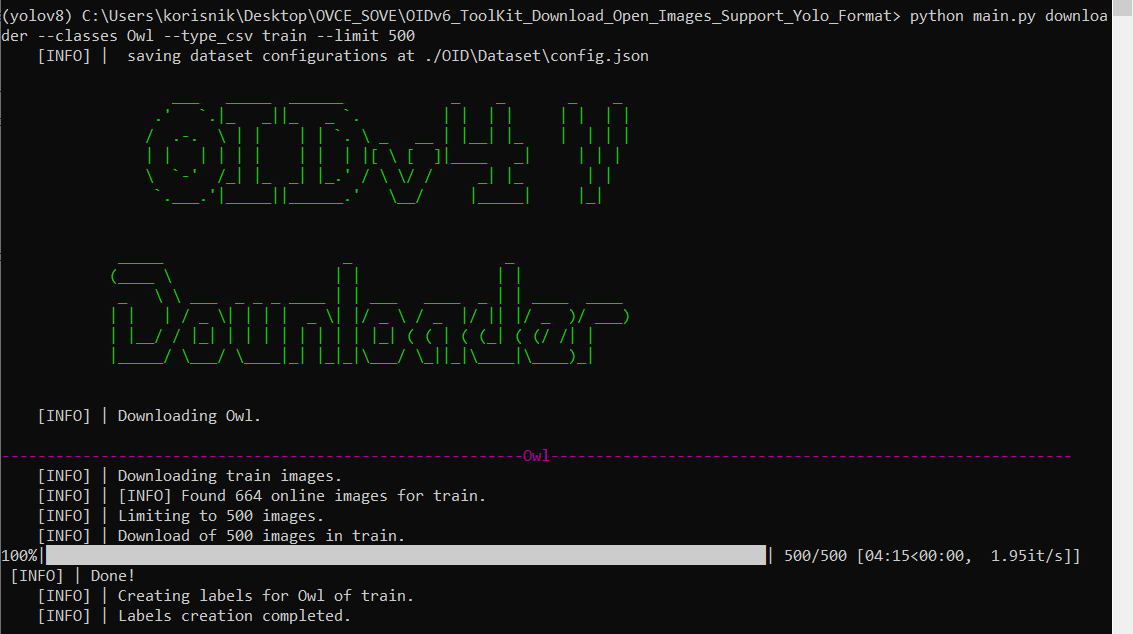

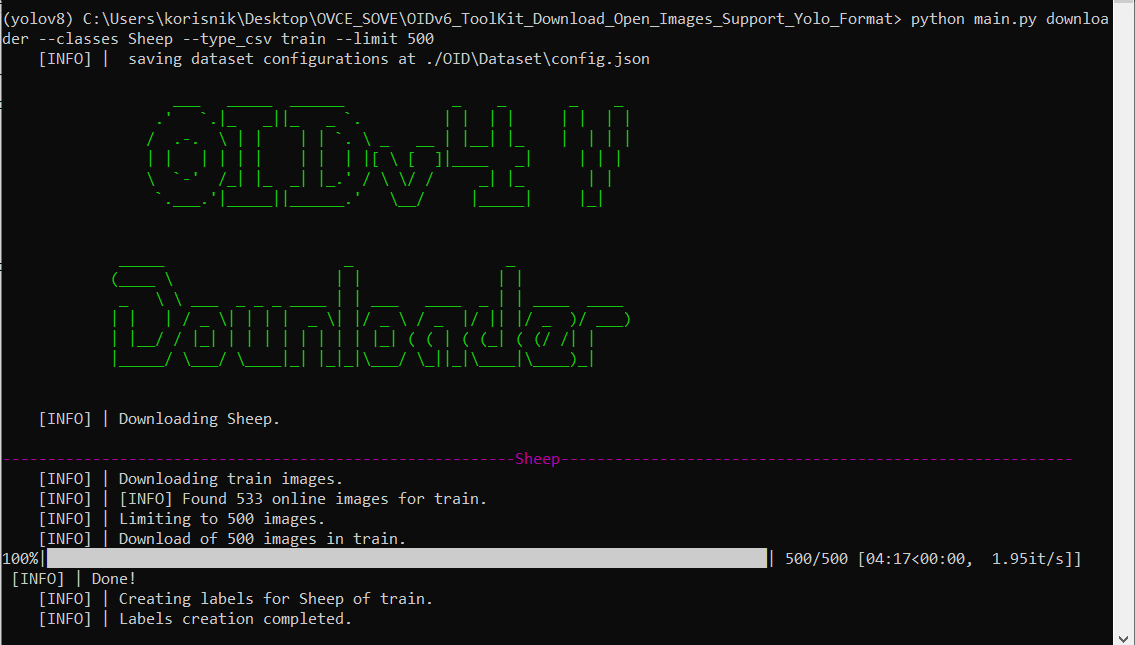

In [20]:
#pokretanje preuzimanja slika klase Owl (sova), a onda i Sheep (ovca), iz train seta, broj slika je 500
#rađeno lokalno jer je trebalo ručno unijeti input za potvrdu

#prikaz screenshotova
display(Image(filename='owl_download.png', height = 500))
display(Image(filename='sheep_download.png', height = 500))

## 4. Preuzimanje dataseta s Roboflowa
Nakon što su slike bile preuzete iz Open Images Dataseta, uploadane su na Roboflow, gdje su podijeljene na train, val i test set. Nakon toga su spremljene u obliku u kojem su anotacije za YOLOv8 detekciju, koje sadrže broj klase i normalizirane koordinate okvira (eng. *bounding box*). Nakon toga se podaci mogu preuzeti. Dataset je javno dostupan na Roboflow-u i može se preuzeti.

Link za dataset: https://universe.roboflow.com/ltomic01/owls_sheep_detection_yolov8/dataset/2



In [2]:
#preuzimanje podataka
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MY_API_KEY")
project = rf.workspace("ltomic01").project("owls_sheep_detection_yolov8")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.9, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to owls_sheep_detection_yolov8-1 in yolov8:: 100%|██████████| 2012/2012 [00:00<00:00, 5035.59it/s]


## 5. Treniranje modela
Treniranje se vrši nad pretreniranim modelom yolov8n (nano), jer je on najmanji i trebao bi najbrže raditi detekcije. Komprompis je što nije nužno najprecizniji.
Kao argumenti zadani su: zadatak detekcija, mod treniranje, putanja do .yaml datoteke koja sadrži putanje do podataka i klase, model, broj epoha i vel. ulazne slike.


In [25]:
!yolo task=detect mode=train data=./owl_sheep_data/data.yaml model=yolov8n.pt epochs=100 imgsz=640

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./owl_sheep_data/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

Na prvoj slici ispod su metrike koje pokazuju kako napreduje treniranje. Loss-ovi trebaju opadati, a precision, recall i mAP se povećavati, poželjno prema 1. Ovdje su ti zahtjevi zadovoljeni.

Druga slika je matrica konfuzije koja govori nad koliko je slika, odnosno objekata na slici napravljena ispravna predikcija u validacijskom setu. Vidi se da su ovce i sove dosta dobro detektirane, međutim dosta je slučajeva gdje je pozadina detektirana kao ovca ili sova. To se može obrazložiti relativno malim brojem slika koje su u različitim kontekstima. Međutim, točnost modela može se povećati i većim brojem epoha i promjenom ostalih parametara, ali podaci su uglavnom najvažniji aspekt (broj i kvaliteta).

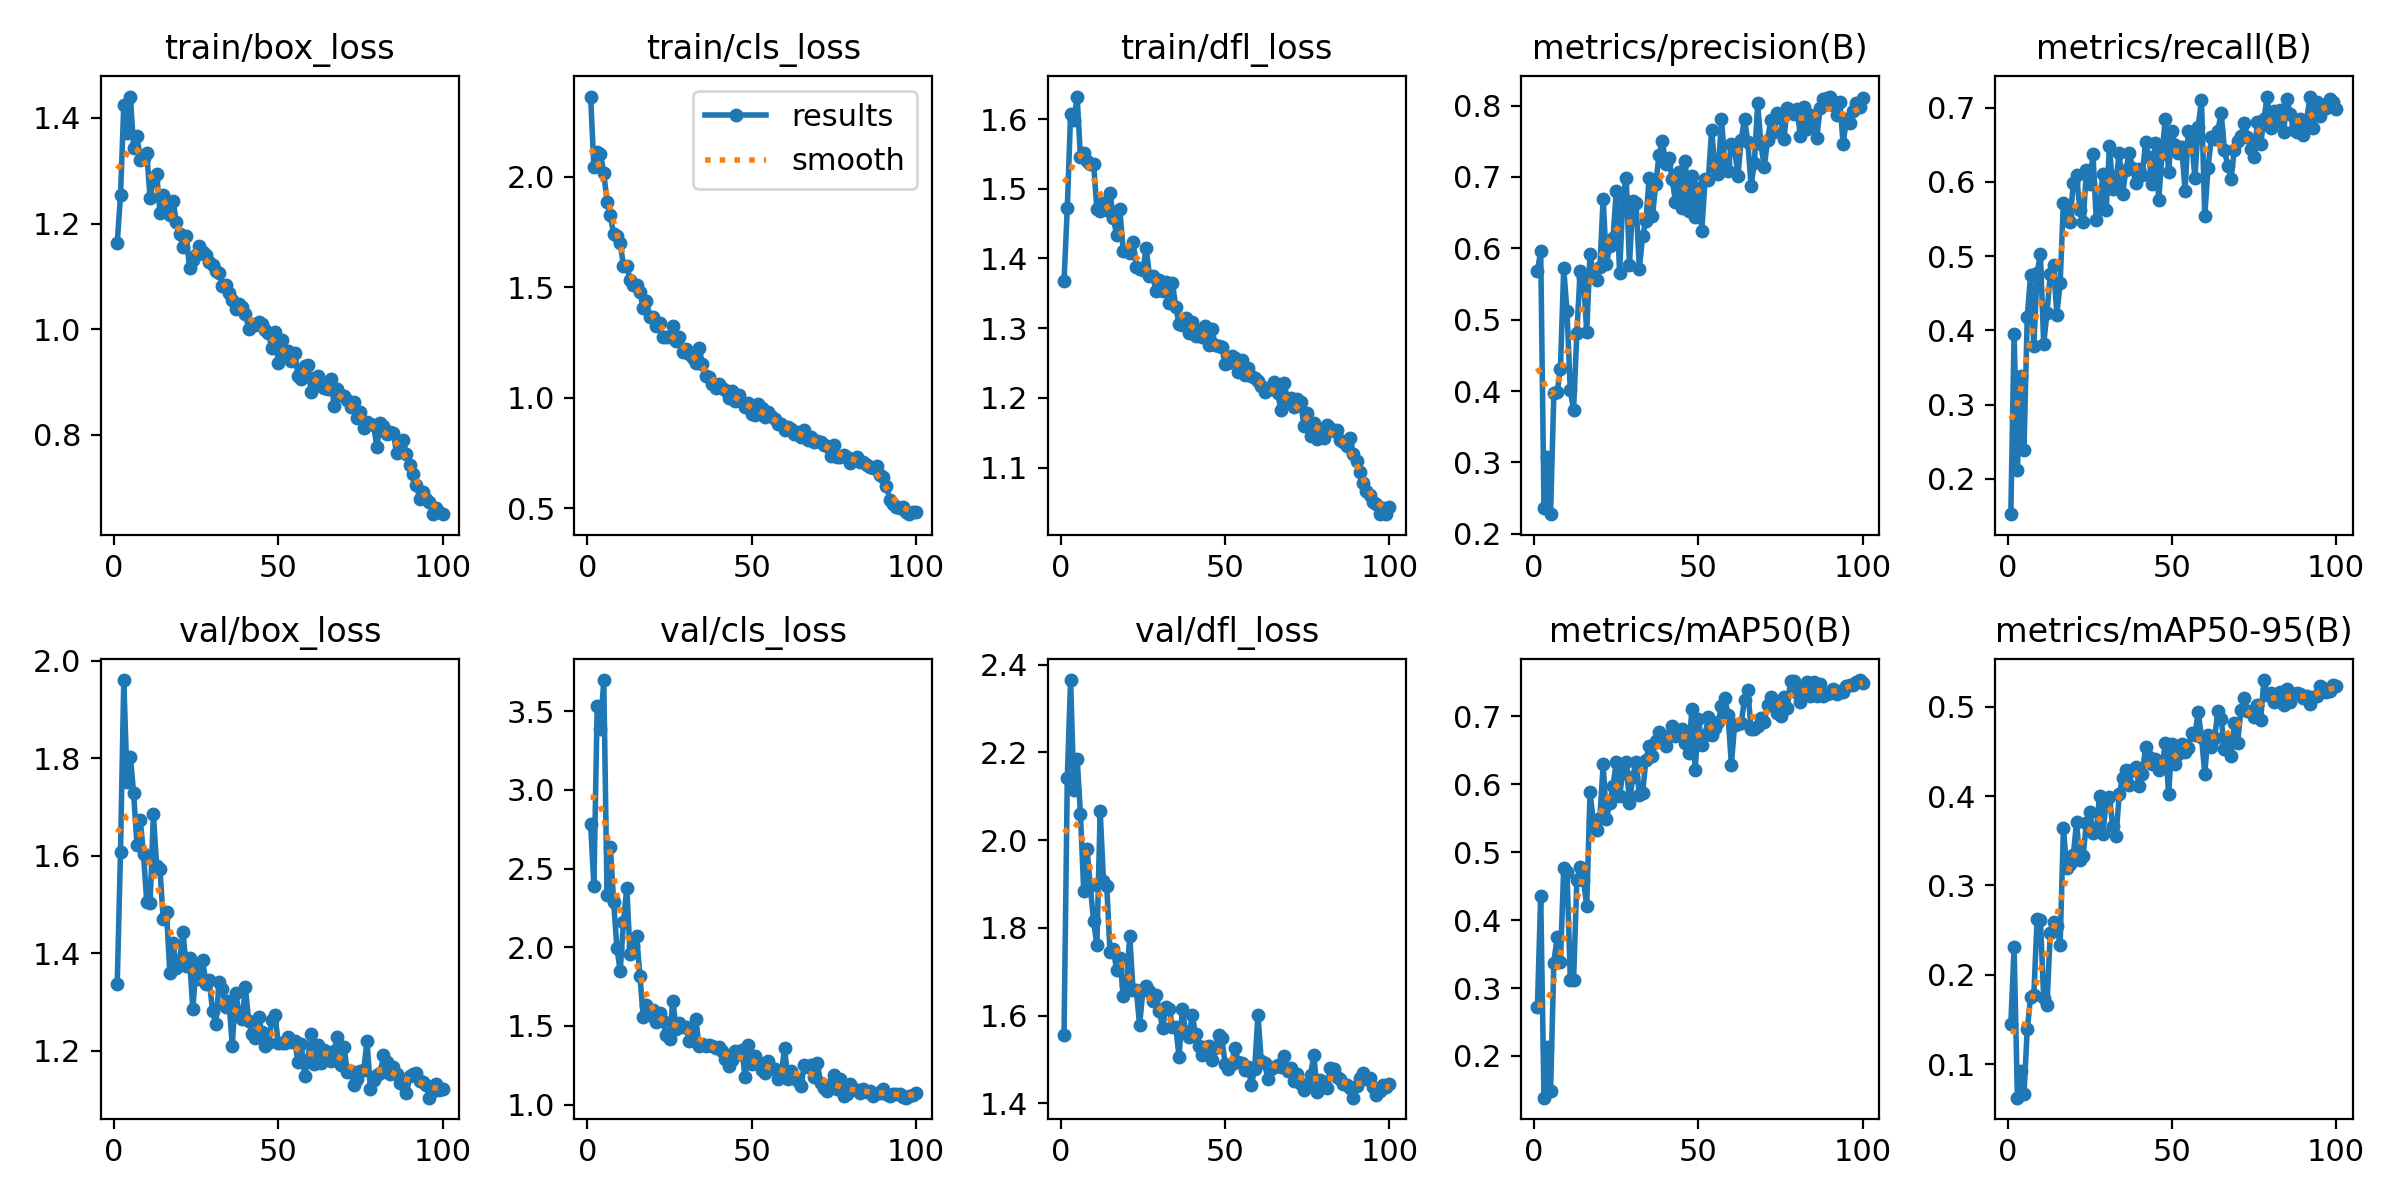

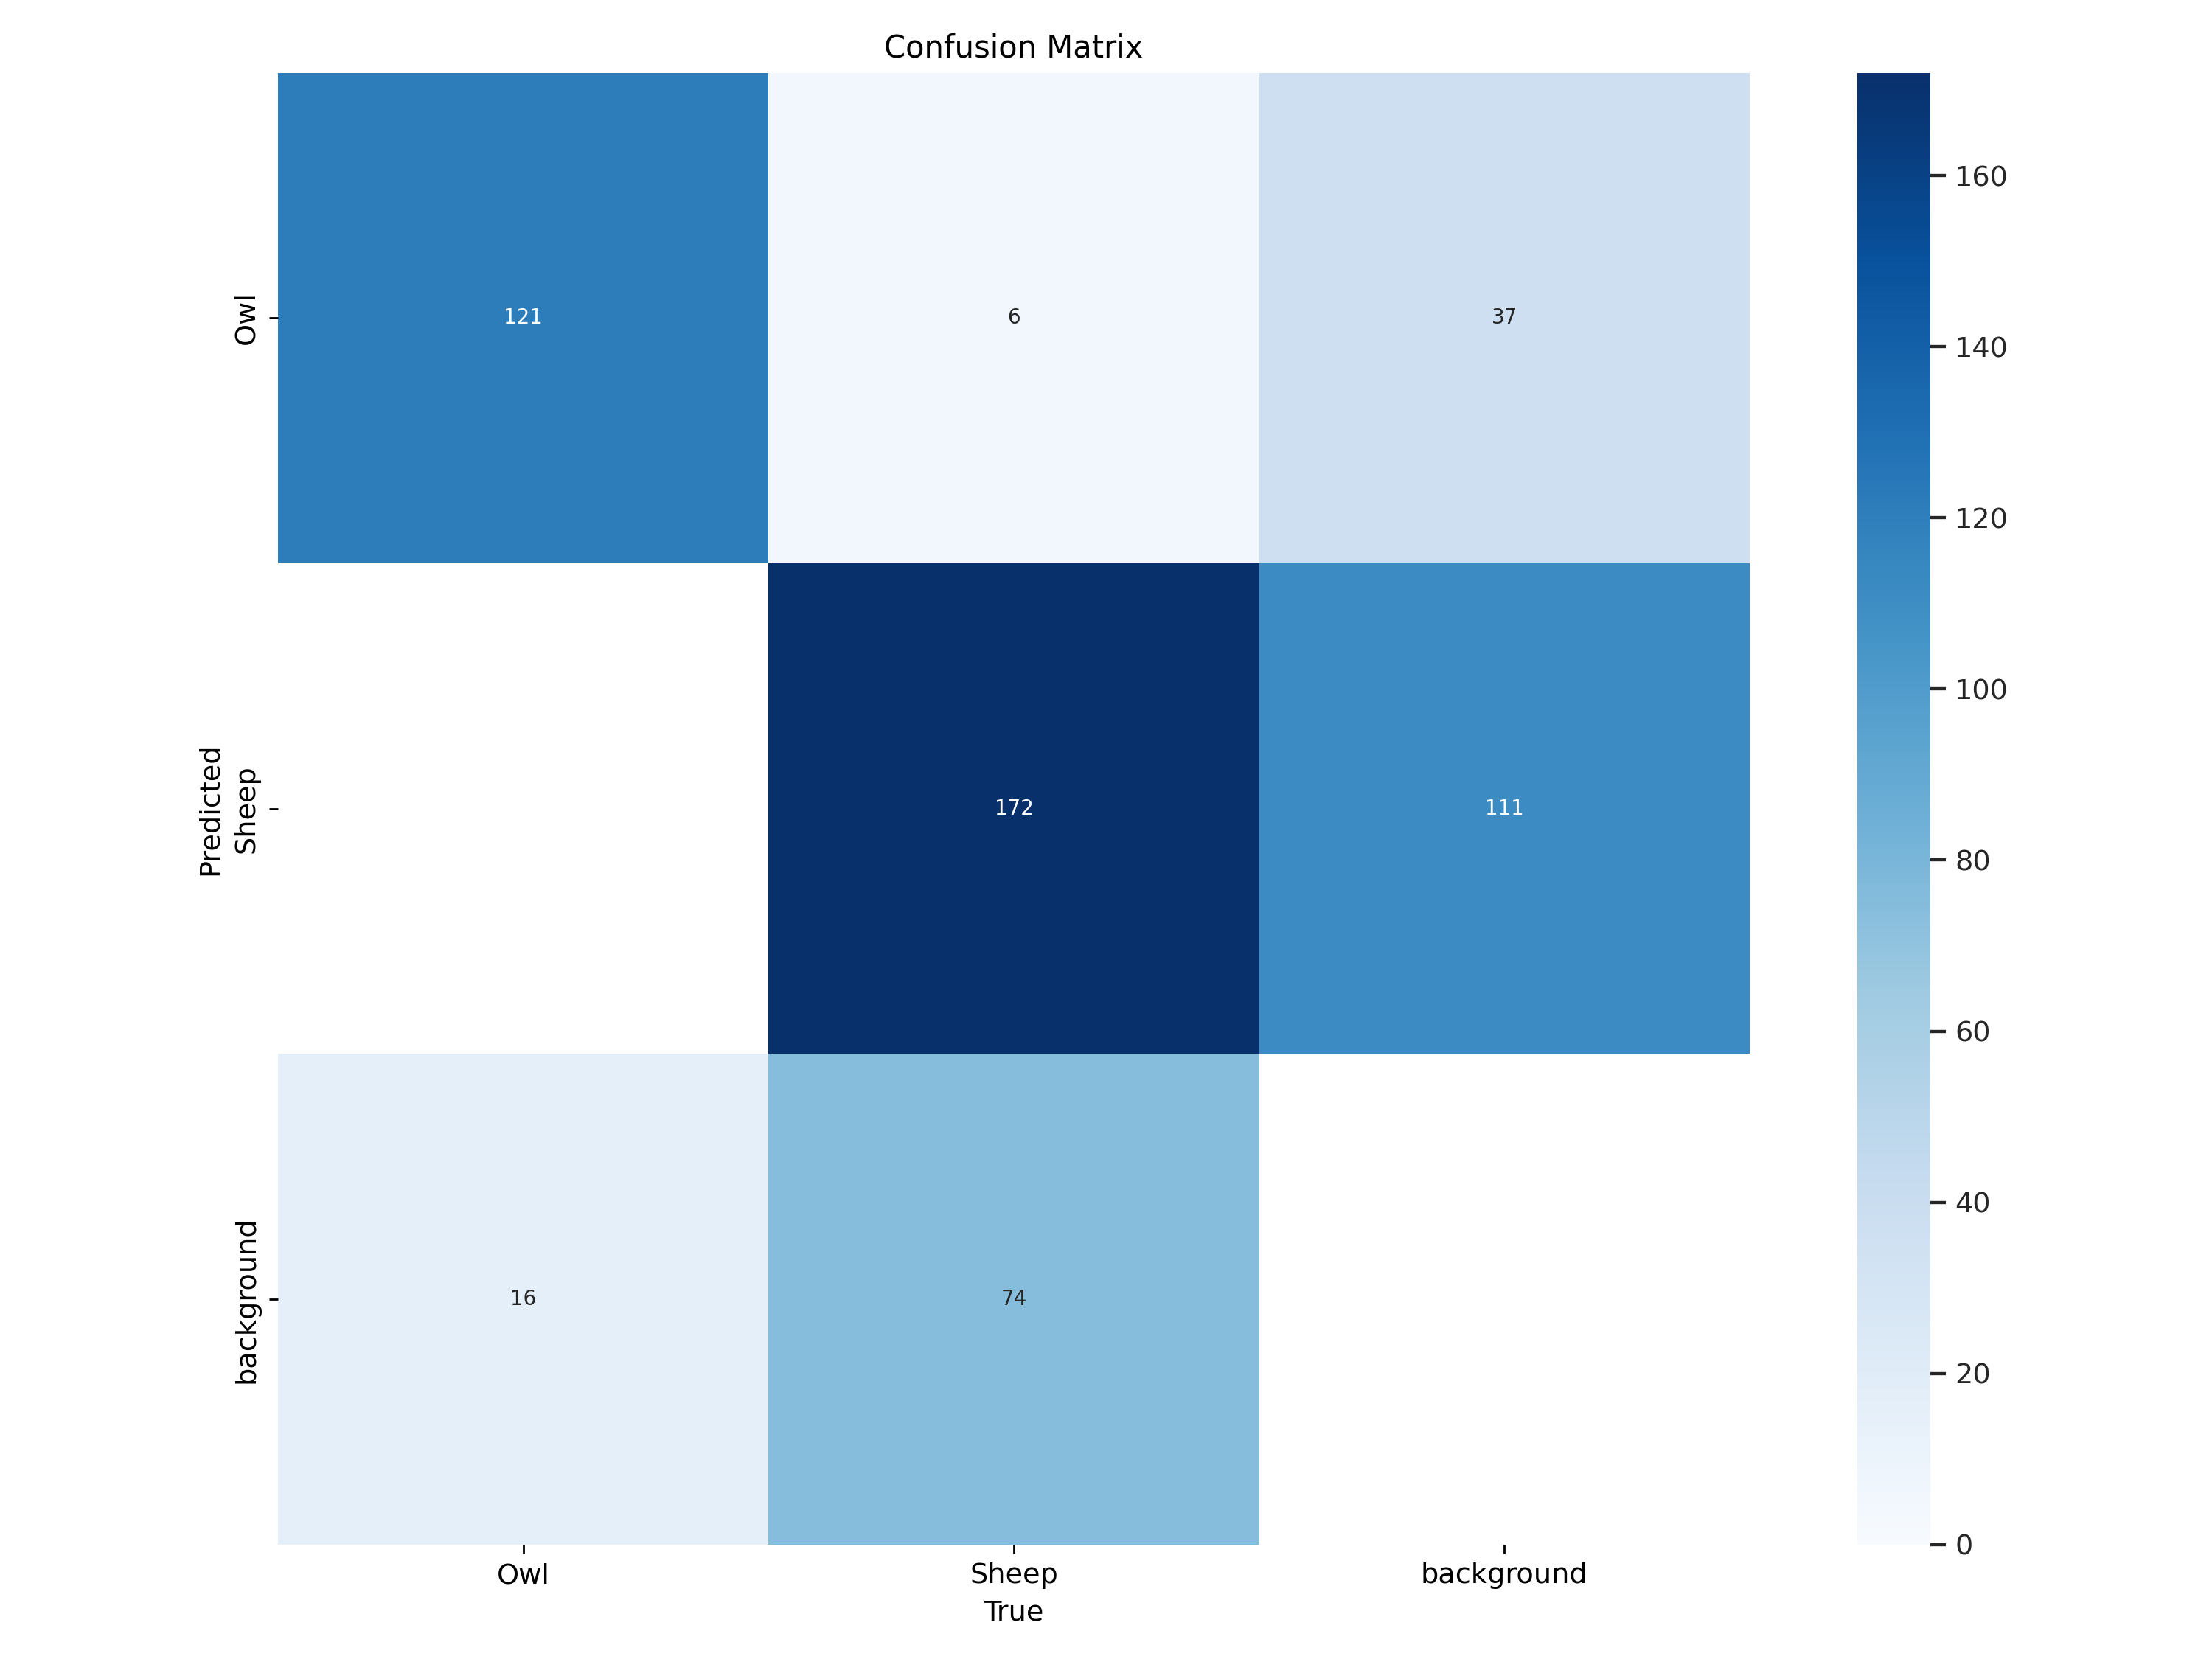

In [62]:
#prikaz reziltata i matrice konfuzije
display(Image(filename='./runs/detect/train/results.png', width=800))
display(Image(filename='./runs/detect/train/confusion_matrix.png', width=800))


##6. Validacija modela
Radi se validacija novog modela na slikama iz validacijskog seta, odnosno nad onim slikama koje model još nije vidio.

In [29]:
!yolo task=detect mode=val data = './owl_sheep_data/data.yaml' model='/content/runs/detect/train/weights/best.pt'  # val custom mode

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/owl_sheep_data/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/owl_sheep_data/valid/images/007856a72e863b13_jpg.rf.a4d197a2725ff42e8ae407442b504f14.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/owl_sheep_data/valid/images/00833d3a8bfeaf9d_jpg.rf.c2eacdb1e0f5025563dcee2a48b5860e.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/owl_sheep_data/valid/images/00ade7621609d895_jpg.rf.fb59fabbea3f905d1f93e470fec46013.jpg: 3 duplicate labels removed
val: WARNING ⚠️ /content/owl_sheep_data/valid/images/00bc274417086be8_jpg.rf.6107fd7b7a0fe182ed8efa8b3b62ba05.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/owl_sheep_data/valid/images/00f6541338e44d7d_jpg.rf.9c70fd0ea674b40b44ec712ab0aa00fe.jpg: 1 duplicate labels remov

Model na kraju pokazuje preciznost od 79.4%, recall 68.4%, a mAP50 je 75.3%. Solidan rezultat s obzirom da je korišteno relativno malo slika koje su u dosta različitim kontekstima, a korišten je nano pretrenirani model (najmanji).

##7. Testiranje modela
Testiranje, odnosno inferencija se vrši nad testnim slikama, kako bi se vidjelo kako model radi. Detekcije su spremljene u mapu runs/detect/predict.

In [32]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' source='./owl_sheep_data/test/images/'

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/100 /content/owl_sheep_data/test/images/0019f2bc4a78d34c_jpg.rf.526497b8c3008f5bcebd7c2128769a1f.jpg: 640x640 1 Owl, 11.0ms
image 2/100 /content/owl_sheep_data/test/images/0052f7b365efcfd6_jpg.rf.4e73ce061c98f210bd283aefeea2ad35.jpg: 640x640 5 Sheeps, 7.4ms
image 3/100 /content/owl_sheep_data/test/images/006df640ce32c5e2_jpg.rf.b235b831732023619620353a2c71eb44.jpg: 640x640 2 Sheeps, 7.3ms
image 4/100 /content/owl_sheep_data/test/images/00c98d53f80c9df4_jpg.rf.2c748e5276e793fce3ad04c74337c960.jpg: 640x640 1 Owl, 1 Sheep, 7.3ms
image 5/100 /content/owl_sheep_data/test/images/00e24d9de9b60276_jpg.rf.b49499023fa11c6ca805c0f1834d5268.jpg: 640x640 2 Sheeps, 7.3ms
image 6/100 /content/owl_sheep_data/test/images/010f09072e40e193_jpg.rf.cca736c942cf29a4150478ce27bbef05.jpg: 640x640 5 Sheeps, 7.3ms
image 7/100 /content/owl_s

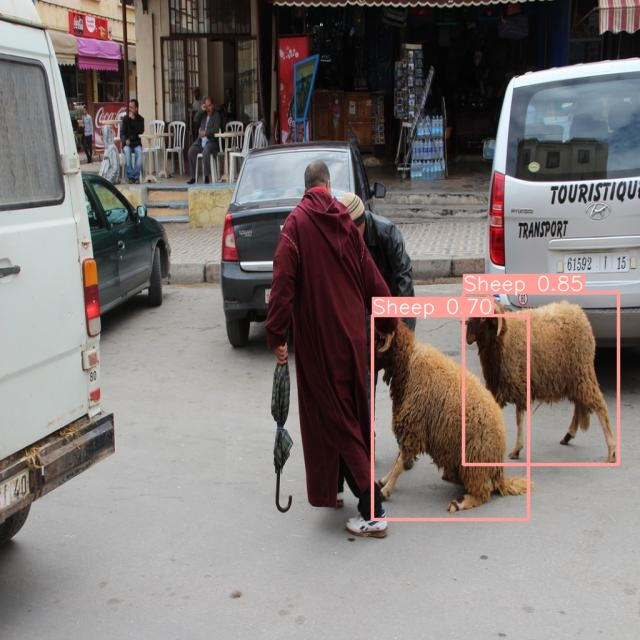

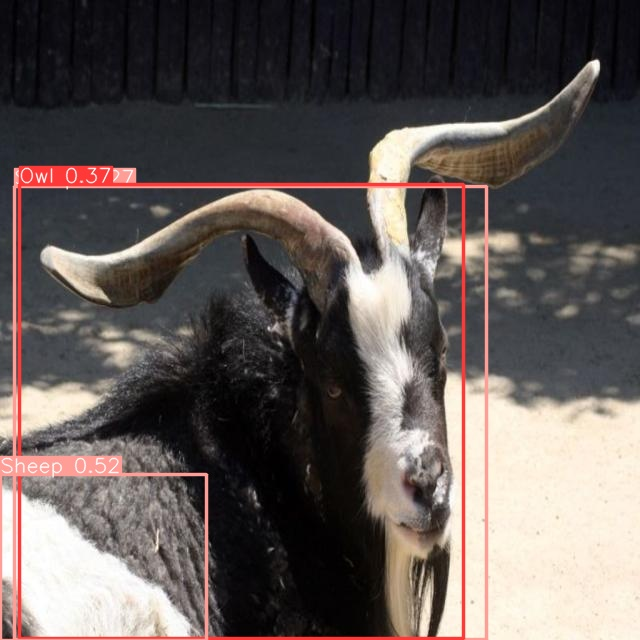

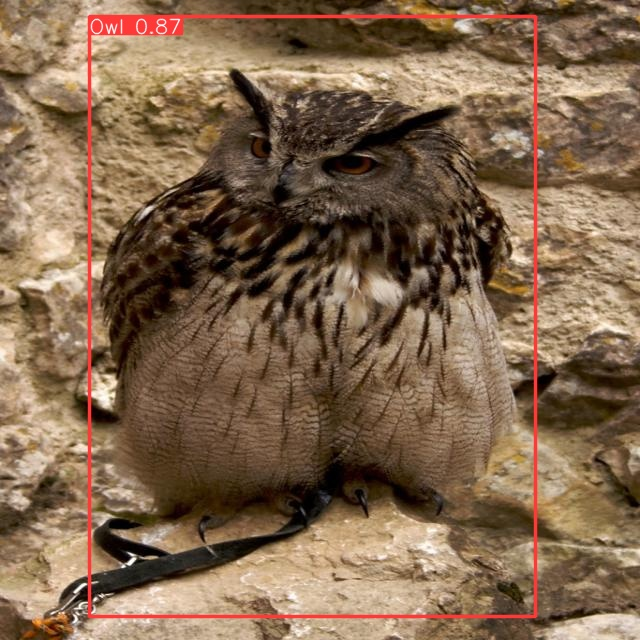

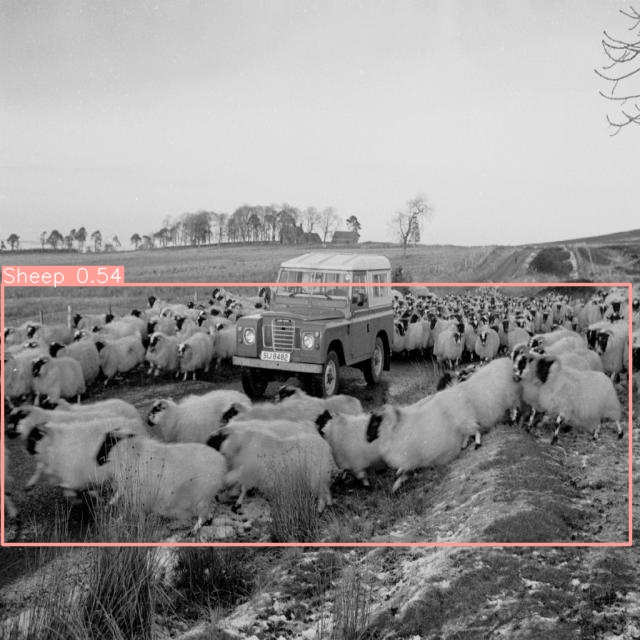

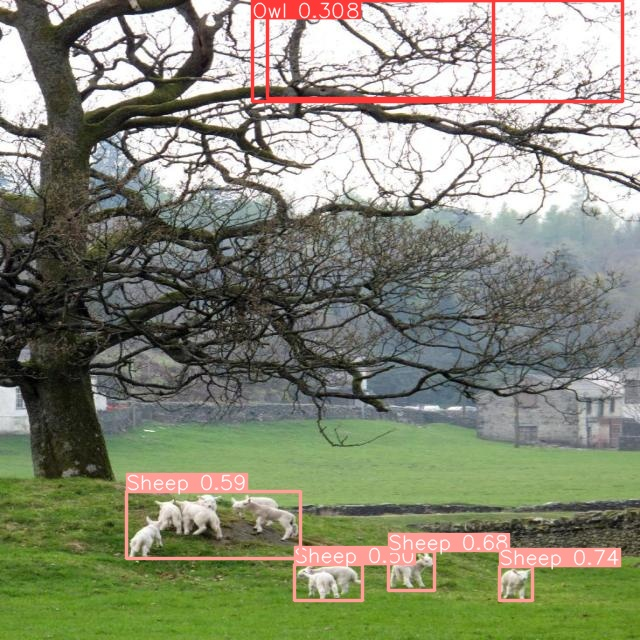

In [38]:
#prikaz nekih od testiranih slika
for image_path in glob.glob('./runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=500))
      print("\n")

In [57]:
%pwd

'/content'

##8. Uploadanje modela na Roboflow radi lakšeg testiranja
Kada se model uploada, može se vršiti inferencija pomoću raličitih izvora.

In [61]:
#deployanje modela
version = project.version(2)
version.deploy("yolov8", "runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.1.9, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/ltomic01/owls_sheep_detection_yolov8/2
Share your model with the world at: https://universe.roboflow.com/ltomic01/owls_sheep_detection_yolov8/model/2


##9. Preuzimanje mape sa Google Colaba

In [54]:
from google.colab import files
files.download("/content/yolov8.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
#zipanje
!zip -r yolov8.zip yolov8_detection

  adding: yolov8_detection/ (stored 0%)
  adding: yolov8_detection/runs/ (stored 0%)
  adding: yolov8_detection/runs/detect/ (stored 0%)
  adding: yolov8_detection/runs/detect/val/ (stored 0%)
  adding: yolov8_detection/runs/detect/val/val_batch0_pred.jpg (deflated 6%)
  adding: yolov8_detection/runs/detect/val/val_batch1_pred.jpg (deflated 5%)
  adding: yolov8_detection/runs/detect/val/PR_curve.png (deflated 13%)
  adding: yolov8_detection/runs/detect/val/val_batch2_pred.jpg (deflated 6%)
  adding: yolov8_detection/runs/detect/val/R_curve.png (deflated 12%)
  adding: yolov8_detection/runs/detect/val/confusion_matrix_normalized.png (deflated 32%)
  adding: yolov8_detection/runs/detect/val/val_batch2_labels.jpg (deflated 6%)
  adding: yolov8_detection/runs/detect/val/confusion_matrix.png (deflated 35%)
  adding: yolov8_detection/runs/detect/val/F1_curve.png (deflated 11%)
  adding: yolov8_detection/runs/detect/val/P_curve.png (deflated 12%)
  adding: yolov8_detection/runs/detect/val/val

## Ostalo

In [50]:
#gledanje postavki
from ultralytics import settings

# ispiši sve postavke
print(settings)

# jedna postavka
value = settings['datasets_dir']
print(value)

{'settings_version': '0.0.4', 'datasets_dir': '/content', 'weights_dir': 'weights', 'runs_dir': 'runs', 'uuid': '569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb', 'sync': True, 'api_key': '', 'openai_api_key': '', 'clearml': True, 'comet': True, 'dvc': True, 'hub': True, 'mlflow': True, 'neptune': True, 'raytune': True, 'tensorboard': True, 'wandb': True}
/content


In [51]:
#ažuriranje postavke
settings.update({'datasets_dir': '/content'})

##Korisni linkovi:

*   Ultralytics GitHub : https://github.com/ultralytics/ultralytics
*   YOLOv8 dokumentacija : https://docs.ultralytics.com/
*   Roboflow : https://roboflow.com/





